# Vehicle Policy Lapse Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def warn(*args, **kwargs): 
    pass 
import warnings 
warnings.warn = warn

# Ignore divide by zero, overflow, and invalid value warnings
np.seterr(divide='ignore', over='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
from pathlib import Path
base_dir = Path.cwd().parent
data_path = base_dir / "data" / "eudirectlapse.csv"

data= pd.read_csv(data_path)

In [4]:
data.head()

,lapse,polholder_age,polholder_BMCevol,polholder_diffdriver,polholder_gender,polholder_job,policy_age,policy_caruse,policy_nbcontract,prem_final,prem_freqperyear,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase,vehicl_garage,vehicl_powerkw,vehicl_region
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


In [5]:
# BASE_DIR = Path(__file__).resolve().parent.parent : API, Pipelines, Bathc Jobs, ML training scripts
# BASE_DIR = Path(os.environ["PROJECT_ROOT"]) : Docker, Kubernetes, Airflow, CI/CD

def load_data():
    return pd.read_csv(DATA_PATH)


In [6]:
data.shape

(23060, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lapse                 23060 non-null  int64  
 1   polholder_age         23060 non-null  int64  
 2   polholder_BMCevol     23060 non-null  object 
 3   polholder_diffdriver  23060 non-null  object 
 4   polholder_gender      23060 non-null  object 
 5   polholder_job         23060 non-null  object 
 6   policy_age            23060 non-null  int64  
 7   policy_caruse         23060 non-null  object 
 8   policy_nbcontract     23060 non-null  int64  
 9   prem_final            23060 non-null  float64
 10  prem_freqperyear      23060 non-null  object 
 11  prem_last             23060 non-null  float64
 12  prem_market           23060 non-null  float64
 13  prem_pure             23060 non-null  float64
 14  vehicl_age            23060 non-null  int64  
 15  vehicl_agepurchase 

In [8]:
data.describe()

,lapse,polholder_age,policy_age,policy_nbcontract,prem_final,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase
count,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000
mean,0.128101,43.045490,2.443452,1.305637,374.123791,380.508774,373.528631,355.882315,13.060624,7.680876
std,0.334209,12.352291,3.100771,0.788647,212.899174,227.937859,201.915809,197.138010,3.590088,4.960701
min,0.000000,19.000000,0.000000,1.000000,46.550000,46.560000,50.110000,45.550000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,1.000000,232.837500,232.630000,245.150000,227.100000,11.000000,4.000000
50%,0.000000,41.000000,1.000000,1.000000,312.250000,311.005000,316.830000,301.445000,13.000000,8.000000
75%,0.000000,49.000000,4.000000,1.000000,448.370000,449.602500,434.452500,423.562500,16.000000,11.000000
max,1.000000,85.000000,17.000000,15.000000,2948.050000,3362.070000,2416.840000,2716.080000,18.000000,18.000000


In [9]:
duplicate_rows = data.duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")

missing_values = data.isnull().sum().sum()
print(f"Missing values: {missing_values}")

Duplicated rows: 0
Missing values: 0


## Exploratory Data Analysis
**Target Variable:** `lapse` 

In [10]:
lapse_counts = data['lapse'].value_counts()
print(lapse_counts)

lapse_percent = data['lapse'].value_counts(normalize=True)*100
lapse_percent

lapse
0    20106
1     2954
Name: count, dtype: int64


lapse
0    87.189939
1    12.810061
Name: proportion, dtype: float64

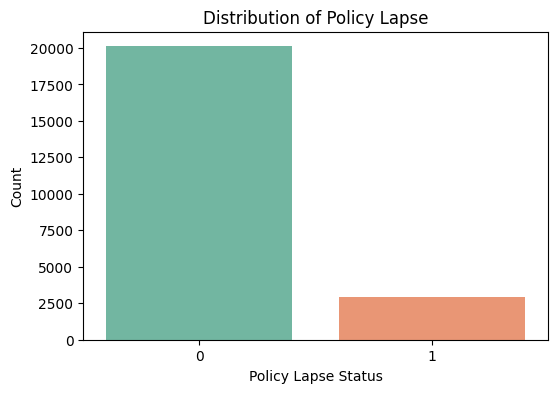

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='lapse', data=data, palette='Set2')
plt.title('Distribution of Policy Lapse')
plt.xlabel('Policy Lapse Status')
plt.ylabel('Count')
plt.show()

#### Target Variable Analysis

* 20,106 policies did not lapse (0): **87.2%**
* 2,954 policies lapsed (1): **12.8%**

The target is highly imbalanced, which is common in insurance lapse/churn data.

**Implications:**

* Models may favor the majority class if no adjustments are made.
* Handling options include class weighting, oversampling the minority class, or using stratified train–test splits.

In [12]:
def hist_and_box_plot(feature):
    plt.figure(figsize=(15,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue')
    plt.axvline(data[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[feature].median(), color='green', linestyle='--', label='Median')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature], color='lightgreen')
    plt.title(f'Boxplot of  {feature}')
    plt.xlabel('Age')

    plt.tight_layout()
    plt.show()

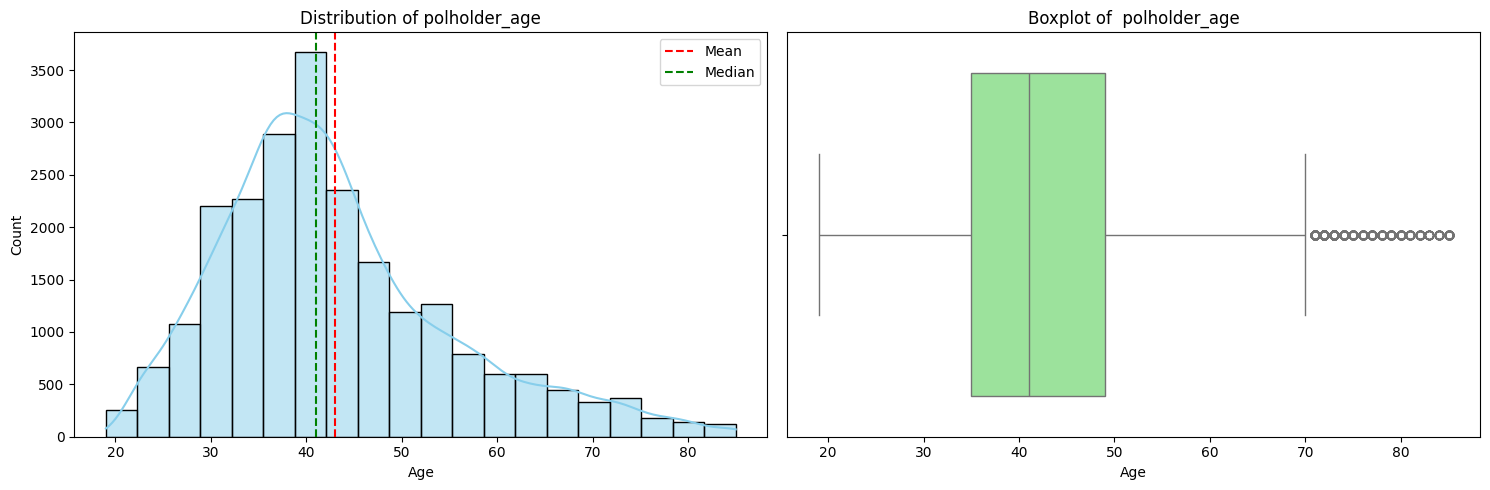

Skewness: 0.8917349177158745


In [13]:
hist_and_box_plot(feature="polholder_age" )
skew_value = data['polholder_age'].skew()
print("Skewness:", skew_value)

#### Policyholder Age Analysis

* Younger policyholders (18–29) have the highest lapse rate (~17%), likely because younger drivers may be less consistent with renewals.
* Lapse decreases with age, showing a clear trend as older policyholders are more stable.
* The oldest group (70–85) has the lowest lapse (~7%). Although rare, these ages are valid and behave logically.
* Distribution is mildly skewed; no transformation is needed.

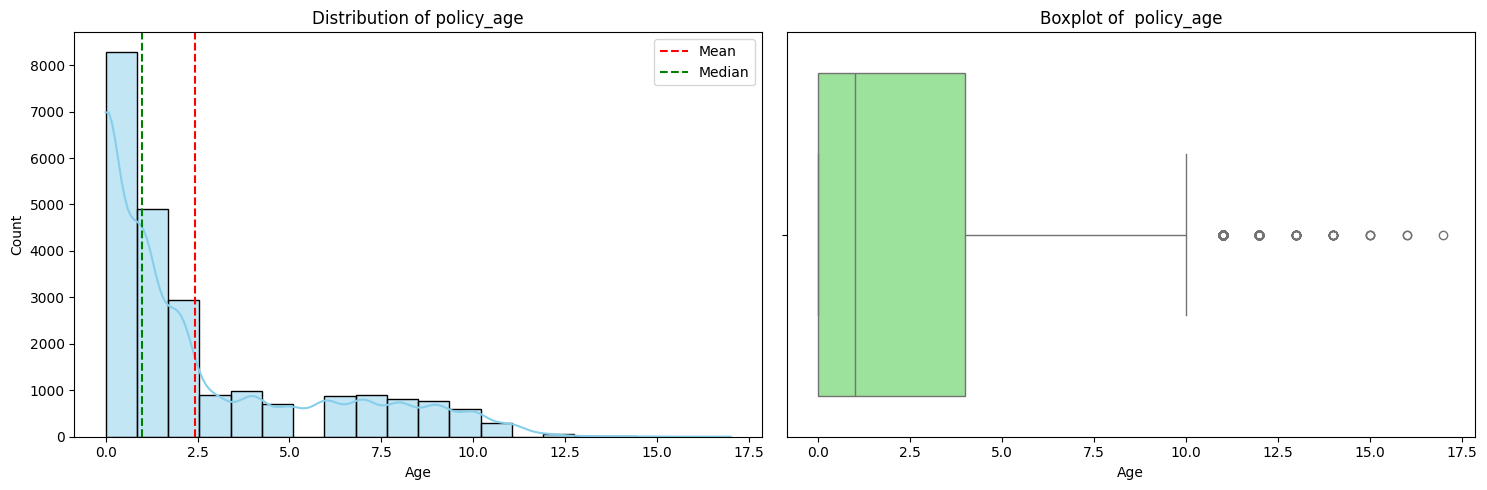

Skewness: 1.327585726638478


In [14]:
hist_and_box_plot(feature="policy_age" )
skew_value = data['policy_age'].skew()
print("Skewness:", skew_value)

### Policy Age Analysis

* Most policies are new (median = 1 year), with a few long-term policies up to 17 years.
* The distribution is right-skewed; values above 10 years are valid and retained.
* Insight: Newer policies may have a higher risk of lapse.
* Policy Age is skewed, with most values between 0 and 2.5; applying a logarithmic or square root transformation is recommended.

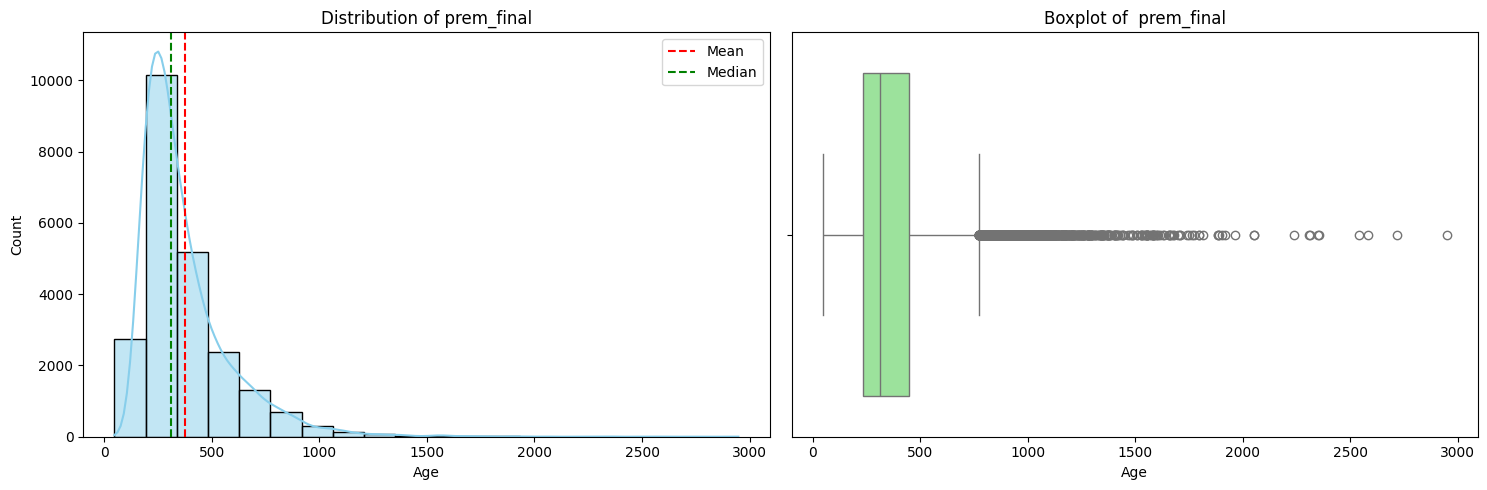

Skewness: 2.2405369605223875


In [15]:
hist_and_box_plot(feature="prem_final" )
skew_value = data['prem_final'].skew()
print("Skewness:", skew_value)


#### Premium Final Analysis

* Median premium is 312.25, with most premiums ranging between 233 and 448.
* Distribution is right-skewed due to some high-value policies (up to ~2948); all values are valid.
* Insight: Higher premiums may influence policy lapse risk.
* Premium Final is strongly skewed; applying a logarithmic transformation is recommended to reduce skewness.

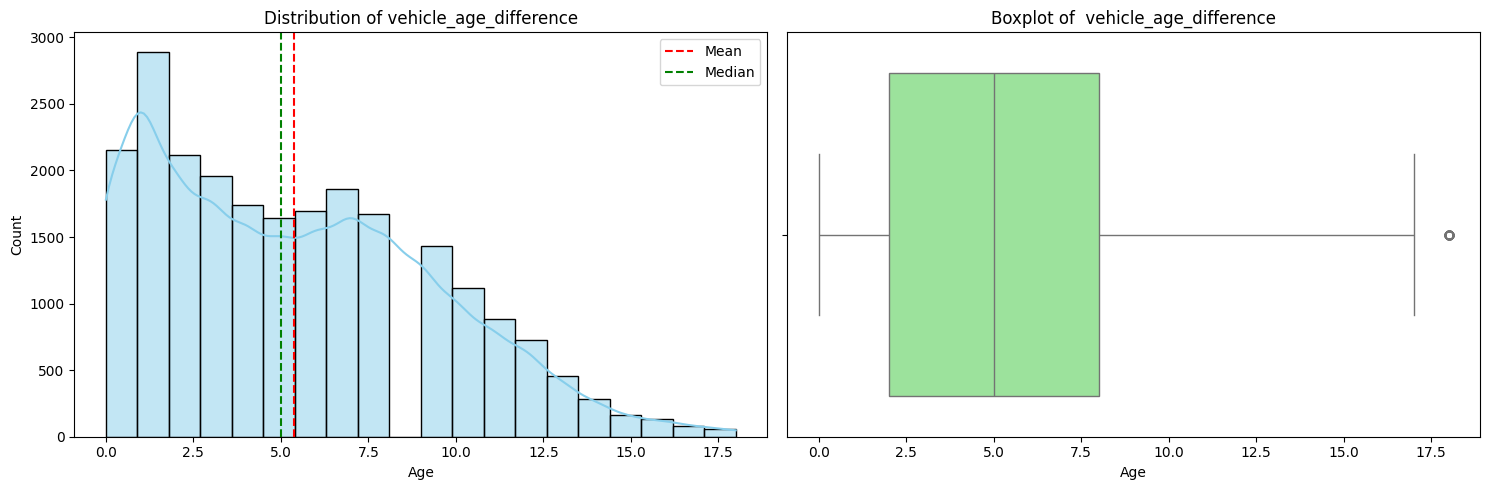

Skewness: 0.5456756584932527


In [16]:
data['vehicle_age_difference'] = data['vehicl_age'] - data['vehicl_agepurchase']
hist_and_box_plot(feature="vehicle_age_difference" )
skew_value = data['vehicle_age_difference'].skew()
print("Skewness:", skew_value)



#### Vehicle Age Difference Analysis

* **`vehicle_age_difference`** measures how much the vehicle has aged since purchase.
* Captures vehicle depreciation, which may influence policy lapse.
* Distribution is mildly skewed; no transformation is required.



In [17]:
premium_cols = ['prem_final', 'prem_last', 'prem_market', 'prem_pure']
corr_matrix = data[premium_cols].corr()
print(corr_matrix)

             prem_final  prem_last  prem_market  prem_pure
prem_final     1.000000   0.950642     0.894923   0.990542
prem_last      0.950642   1.000000     0.838543   0.925565
prem_market    0.894923   0.838543     1.000000   0.899280
prem_pure      0.990542   0.925565     0.899280   1.000000


### Premium Features Analysis

* Most premium features are right-skewed with valid high values; no removal is needed.
* Highly correlated; retain **only `prem_final`** as it represents all premium information.
* Insight: Higher premiums may influence policy lapse risk.

### **Numerical Feature Analysis**
| Feature                    | Key Observation / Insight                                                                                                     | Decision |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | -------- |
| **polholder_age**          | Younger policyholders (18–29) have highest lapse (~17%), older policyholders more stable                                      | Keep     |
| **policy_age**             | Most policies are 0–4 years old; lapse slightly higher for new policies                                                       | Keep     |
| **vehicle_age_difference** | Difference between current vehicle age and purchase age reflects vehicle depreciation; higher differences may influence lapse | Keep     |
| **prem_final**             | Reflects final premium paid; outliers exist but are plausible; higher premiums slightly correlate with lower lapse            | Keep     |
| **prem_last**              | Highly correlated with prem_final (0.95); redundant                                                                           | Drop     |
| **prem_market**            | Highly correlated with prem_final (0.89); redundant                                                                           | Drop     |
| **prem_pure**              | Highly correlated with prem_final (0.99); redundant                                                                           | Drop     |

## Catrgorical fetaures 

In [18]:
def cross_table(feature):
    return data.groupby(feature)['lapse'].value_counts(normalize=True).mul(100).round(2)

cat_columns = ['polholder_BMCevol', 'polholder_diffdriver', 'polholder_gender', 
               'polholder_job', 'policy_caruse', 'vehicl_garage', 'vehicl_region']

for col in cat_columns:
    print(cross_table(col))
    print(f"\n------------------------------------")


polholder_BMCevol  lapse
down               0        83.87
                   1        16.13
stable             0        89.77
                   1        10.23
up                 0        90.22
                   1         9.78
Name: proportion, dtype: float64

------------------------------------
polholder_diffdriver  lapse
all drivers > 24      0        88.14
                      1        11.86
commercial            0        95.00
                      1         5.00
learner 17            0        80.95
                      1        19.05
only partner          0        87.17
                      1        12.83
same                  0        87.75
                      1        12.25
unknown               0        83.33
                      1        16.67
young drivers         0        83.27
                      1        16.73
Name: proportion, dtype: float64

------------------------------------
polholder_gender  lapse
Female            0        88.04
                  1       

### **Categorical Feature Analysis**

The analysis of categorical features shows clear differences in policy lapse behavior:

| Feature                  | Key Observation                                           | Lapse Rate (%) Range |
| ------------------------ | --------------------------------------------------------- | -------------------- |
| **polholder_BMCevol**    | *Down* has highest lapse, *stable* and *up* lower         | 10 – 16              |
| **polholder_diffdriver** | *learner 17/young drivers* highest lapse, commercial lowest    | 5 – 19               |
| **polholder_gender**     | *Males* slightly higher than *females*                        | 12 – 13.3            |
| **polholder_job**        | *Medical* professionals lower lapse than *normal* occupations | 12.1 – 13.3          |
| **policy_caruse**        | *Commercial* vehicles highest, *unknown* lowest               | 8.4 – 20             |
| **vehicl_garage**        | *Underground* garage highest, *private estate* lowest         | 8 – 16.6             |
| **vehicl_region**        | Regional differences: *Reg12* highest, *Reg2* lowest          | 7.4 – 18             |

**Conclusion:** All categorical features show meaningful variation in lapse rates and are retained for modeling. 

### **Ordinal Feature Analysis**

In [19]:
data['policy_nbcontract'].value_counts()

policy_nbcontract
1     18259
2      3541
3       793
4       270
5        87
6        39
7        31
10       11
8         9
9         6
15        6
11        4
13        2
12        1
14        1
Name: count, dtype: int64

In [20]:
data['prem_freqperyear'].value_counts()

prem_freqperyear
1 per year     11680
4 per year      6114
2 per year      3090
12 per year     2176
Name: count, dtype: int64

In [21]:
data['vehicl_powerkw'].value_counts()

vehicl_powerkw
75 kW         10339
100 kW         5116
25-50 kW       4968
125-300 kW     1720
150 kW          580
175 kW          206
225 kW           77
200 kW           32
250 kW           16
275 kW            4
300 kW            2
Name: count, dtype: int64

Ordinal features were analyzed based on their natural ordering, distribution, and relationship with the target variable. Rare values were reviewed to avoid sparsity while preserving business meaning.

| Feature               | Key Observation / Insight                                                                 | Decision |
| --------------------- | ------------------------------------------------------------------------------------------ | -------- |
| **policy_nbcontract** | Highly skewed; majority of policies have 1 contract, very high values are rare             | Keep (group rare high values) |
| **prem_freqperyear**  | Clear order in payment frequency; reflects customer payment behavior                       | Keep     |
| **vehicl_powerkw**    | Ordinal with long tail; very high power values are rare                                     | Keep (group rare high values) |

**Conclusion:** All ordinal features are retained. Rare high values will be grouped where necessary, and ordinal encoding will be applied during modeling.


---